##  Thera Bank :Campaign for selling personal loans

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

     -Read the column description and ensure you understand each attribute well
     -Study the data distribution in each attribute, share your findings. (5 points)
     -Get the target column distribution. Your comments
     -Split the data into training and test set in the ratio of 70:30 respectively
     -Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer     buying personal loans (15 points)
     -Print the confusion matrix for all the above models (5 points)
     -Give your reasoning on which is the best model in this case and why it performs better? (5 points)

### Importing Libraries

In [112]:
import warnings
warnings.filterwarnings('ignore')           # Ignore warnings

import pandas as pd                         # For converting .csv file into Dataframe
import numpy as np                          # For Numeric operations
import seaborn as sns                       # For Data Visualization
import matplotlib.pyplot as plt             # For plotting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score
from sklearn import metrics
%matplotlib inline

In [113]:
DF_TheraBank =  pd.read_csv('Bank_Personal_Loan_Modelling.csv')  # Importing csv file into a Pandas.DataFrame

In [114]:
DF_TheraBank.shape   # Dataset consist of 5000 entries with 14 attributes

(5000, 14)

In [115]:
DF_TheraBank.info()  # Dataset doesnt consist of any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [116]:
DF_TheraBank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [117]:
DF_TheraBank.describe().transpose()
# By looking at DF_TheraBank.describe() we can say that there is some ambiguties in the data.
# Experience column has a minimum value of -3.0 which is not possible so Data Cleaning needs to be done.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Information of the attributes
  The attributes can be divided accordingly :

ID column does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.


### The binary category have five variables as below: 0 means 'No'  & 1 means 'Yes'

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our **target variable**
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

### Interval variables are as below:

* Age - Age of the customer in years
* Experience - Years of experience
* Income - Annual income in $000
* CCAvg - Average credit card spending 
* Mortage - Value of House Mortgage

### Ordinal Categorical Variables are:

* Family - Family size of the customer
* Education - education level of the customer

### The nominal variable is :

* ID
* Zip Code


In [118]:
# No columns have null data in the file
DF_TheraBank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [119]:
# Finding unique data in dataframe
DF_TheraBank.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

* Dataset has no missing values
* As we have observed from the 5 point summary of the data Experience column has negative values which has no meaning.

###  Data Cleaning

#### Handling missing values / unknown / negative values in data

In [120]:
# There are 52 records with negative experience. Before proceeding any further we need to clean the same
DF_TheraBank[DF_TheraBank['Experience'] < 0]['Experience'].count()

52

In [121]:
# Cheching the correlation of Experience with other variables.
DF_TheraBank.corr()['Experience']

ID                   -0.008326
Age                   0.994215
Experience            1.000000
Income               -0.046574
ZIP Code             -0.028626
Family               -0.052563
CCAvg                -0.050077
Education             0.013152
Mortgage             -0.010582
Personal Loan        -0.007413
Securities Account   -0.001232
CD Account            0.010353
Online                0.013898
CreditCard            0.008967
Name: Experience, dtype: float64

#### Experience has positive corelation with Age.

* We can replace negative 'Experience' values with the median of total remaining 'Experience' values but it will be not 
  appropriate. So, we will derive various medians of Experience data on the basis of group of respective Age of Customers.
* Steps Taken to derive median of Experiences on the basis of Age groups -: 
    1. Creating a group of 'Age' values where  negative values in 'Experience' exists.
    2. Creating a list of indexes of negative values in 'Experience'.
    3. Replace negative 'Experience' values with the 'Experience' median.

In [122]:
# Creating a list of ages.
ages = DF_TheraBank[DF_TheraBank['Experience'] < 0]['Age'].unique().tolist()

# Creating a list of indexes.
indexes = DF_TheraBank[DF_TheraBank['Experience'] < 0].index.tolist()

# Replacing Negative Value with median.
for i in indexes:
    for x in ages:
        DF_TheraBank.loc[i,'Experience'] = DF_TheraBank[(DF_TheraBank.Age == x) & (DF_TheraBank.Experience > 0)].Experience.median()
        

In [123]:
# checking if there are records with negative experience
DF_TheraBank[DF_TheraBank['Experience'] < 0]['Experience'].count()

0

In [124]:
DF_TheraBank.isna().sum()  # Checking for any null value in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Detecting Outliers

In [125]:
# Outlier is defined as Data points above or below than 1.5 times the Inter Quartile Range of the data.
numerical = ['Age','Income','Experience','CCAvg','Mortgage']
Q1 = DF_TheraBank[numerical].quantile(0.25)
Q3 = DF_TheraBank[numerical].quantile(0.75)
IQR = Q3 - Q1
out = (DF_TheraBank[numerical] < (Q1 - 1.5 * IQR)) | (DF_TheraBank[numerical] > (Q3 + 1.5 * IQR))
out.sum()

Age             0
Income         96
Experience      0
CCAvg         324
Mortgage      291
dtype: int64

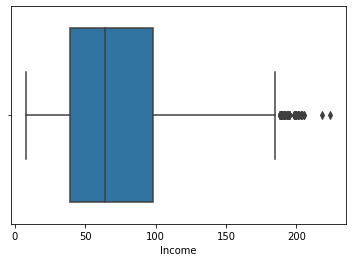

In [126]:
sns.boxplot(x=DF_TheraBank['Income']);

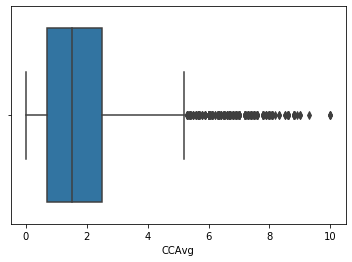

In [127]:
sns.boxplot(x=DF_TheraBank['CCAvg']);

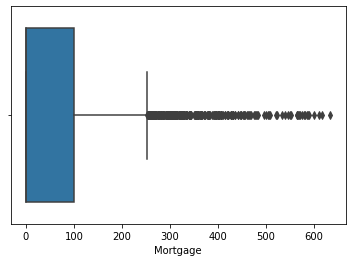

In [128]:
sns.boxplot(x=DF_TheraBank['Mortgage']);

#### Age,CCAvg and Mortgate contains many outliers.

##   Distribution of Numerical Features

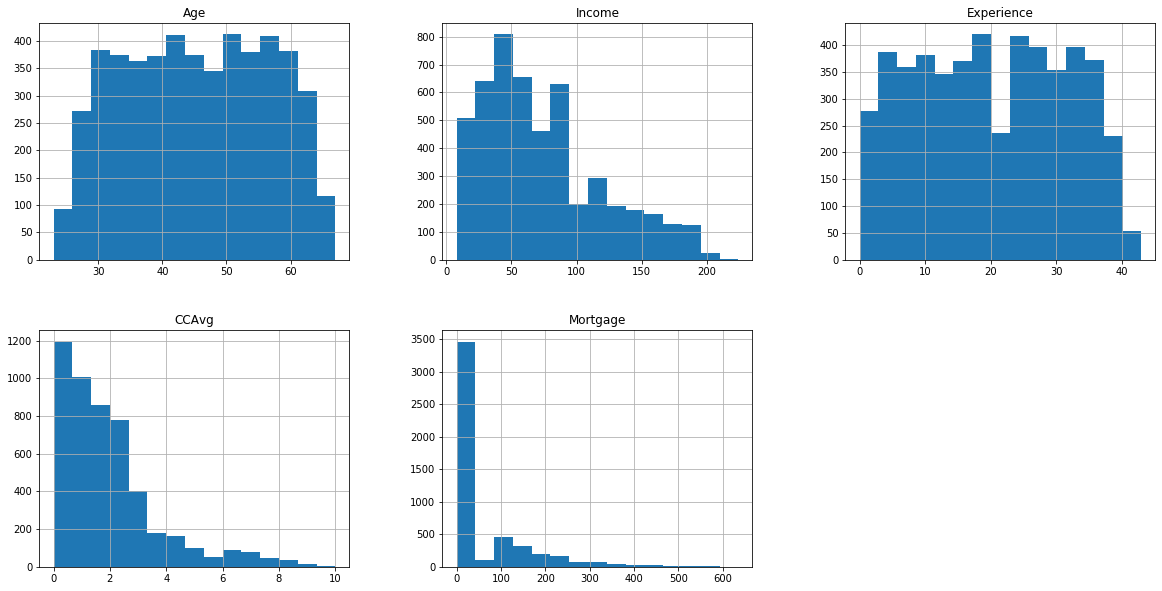

In [129]:
DF_TheraBank[numerical].hist(bins=15, figsize=(20, 10), layout=(2, 3));

* Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm     this by looking at the describe statement above, which shows mean is almost equal to median
* Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to         median. There are negative values in the Experience. This could be a data input error as in general it is not possible to       measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
* Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean   is greater than the median
* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
* Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K



### Distribution of categorical features and their relation with the target feature

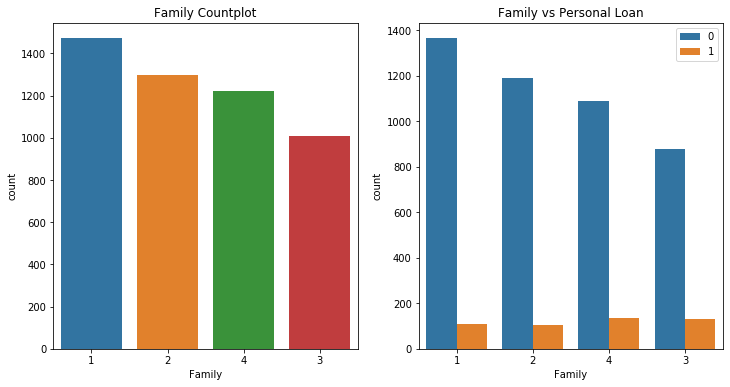

In [130]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(DF_TheraBank['Family'],hue=DF_TheraBank['Personal Loan'],ax=axes[1],order = DF_TheraBank["Family"].value_counts().index)
plt.legend()
ax.set_title('Family vs Personal Loan')
ax = sns.countplot(DF_TheraBank['Family'],ax=axes[0],order = DF_TheraBank["Family"].value_counts().index)
plt.legend()
ax.set_title('Family Countplot')
plt.show()

 * Majority of the customers have family size 1.
 * More number of family size have accepted the loan

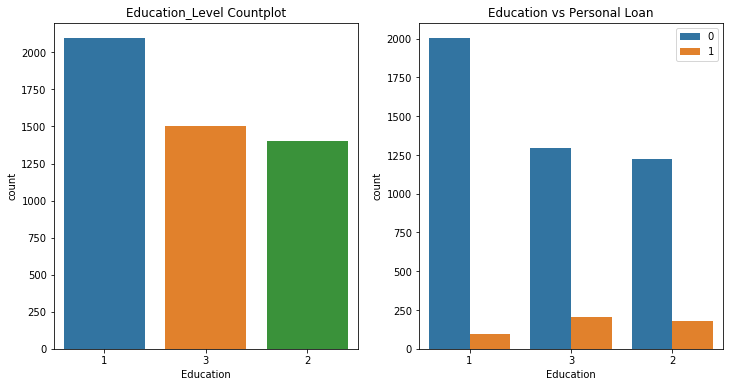

In [131]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(DF_TheraBank['Education'],hue=DF_TheraBank['Personal Loan'],ax=axes[1],order = DF_TheraBank["Education"].value_counts().index)
plt.legend()
ax.set_title('Education vs Personal Loan')
ax = sns.countplot(DF_TheraBank['Education'],ax=axes[0],order = DF_TheraBank["Education"].value_counts().index)
plt.legend()
ax.set_title('Education_Level Countplot')
plt.show()

* More than 2000 customres has Undergraduate and very less to accept for loan
* Customers who are Graduate and Professional are more likely to accept loan than undergraduate.

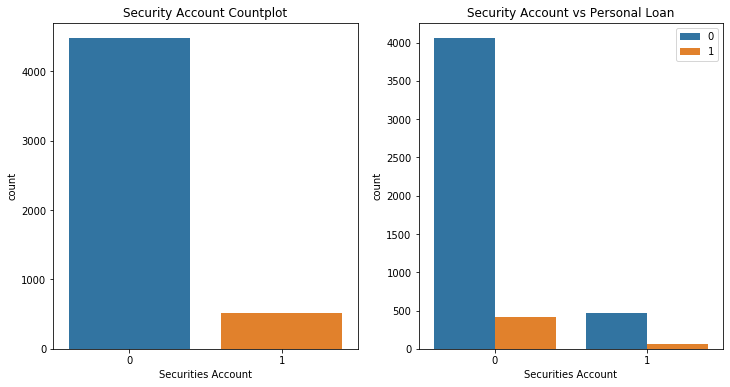

In [132]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(DF_TheraBank['Securities Account'],hue=DF_TheraBank['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('Security Account vs Personal Loan')
ax = sns.countplot(DF_TheraBank['Securities Account'],ax=axes[0])
plt.legend()
ax.set_title('Security Account Countplot')
plt.show()

* More than 4000 customers do not have Securities Account

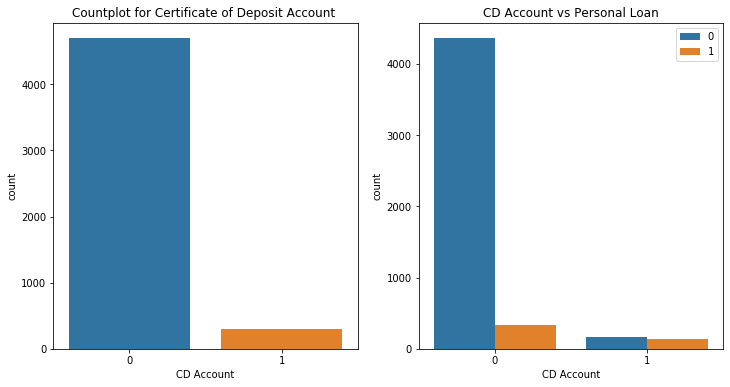

In [133]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(DF_TheraBank['CD Account'],hue=DF_TheraBank['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('CD Account vs Personal Loan')
ax = sns.countplot(DF_TheraBank['CD Account'],ax=axes[0])
plt.legend()
ax.set_title('Countplot for Certificate of Deposit Account ')
plt.show()

* Most of the customer do not have CD Account.
* Almost al customers who has CD Account has accepted the loan 

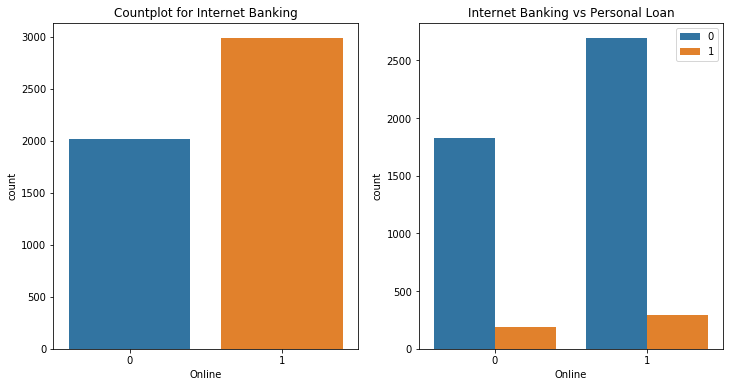

In [134]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(DF_TheraBank['Online'],hue=DF_TheraBank['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('Internet Banking vs Personal Loan')
ax = sns.countplot(DF_TheraBank['Online'],ax=axes[0])
plt.legend()
ax.set_title('Countplot for Internet Banking')
plt.show()

* Most of the customers uses Online Banking

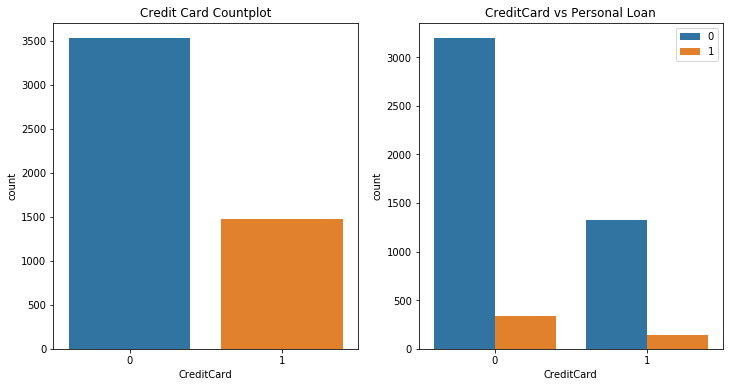

In [135]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(DF_TheraBank['CreditCard'],hue=DF_TheraBank['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('CreditCard vs Personal Loan')
ax = sns.countplot(DF_TheraBank['CreditCard'],ax=axes[0])
plt.legend()
ax.set_title('Credit Card Countplot')
plt.show()

* Most of the customer do not use credit card offered by the bank.

### Relationship of some numerical features with target feature

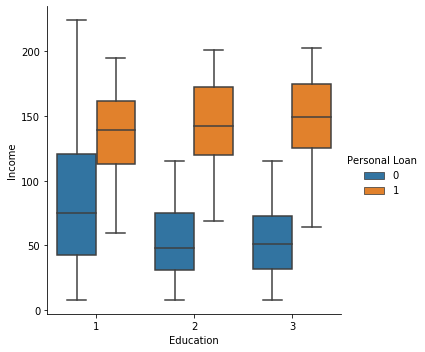

In [136]:
sns.catplot(x='Education', y = 'Income', data = DF_TheraBank,kind= 'box',hue='Personal Loan')

* From the above plot we can infer that customer having annual income in the range of (120 and 170)$ has accepted the loan.
* It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

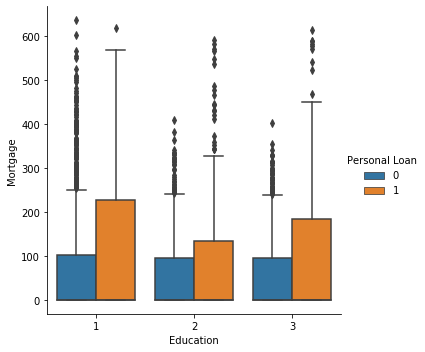

In [137]:
sns.catplot(x='Education',y='Mortgage',data=DF_TheraBank,hue='Personal Loan',kind='box')

* From the above chart it seems that customer who has personal loan have high mortgage

### Distribution of the target column

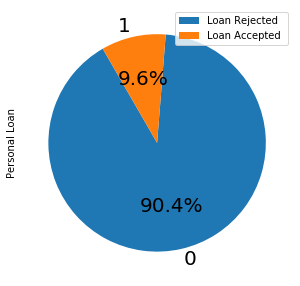

In [138]:
fig,ax = plt.subplots( figsize=(7,5) )
DF_TheraBank['Personal Loan'].value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=120)
plt.legend(['Loan Rejected','Loan Accepted '])
plt.show()

* The dataset is biased
* The percentage of customers who has accepted the loan is very less

### Correlation among the attributes

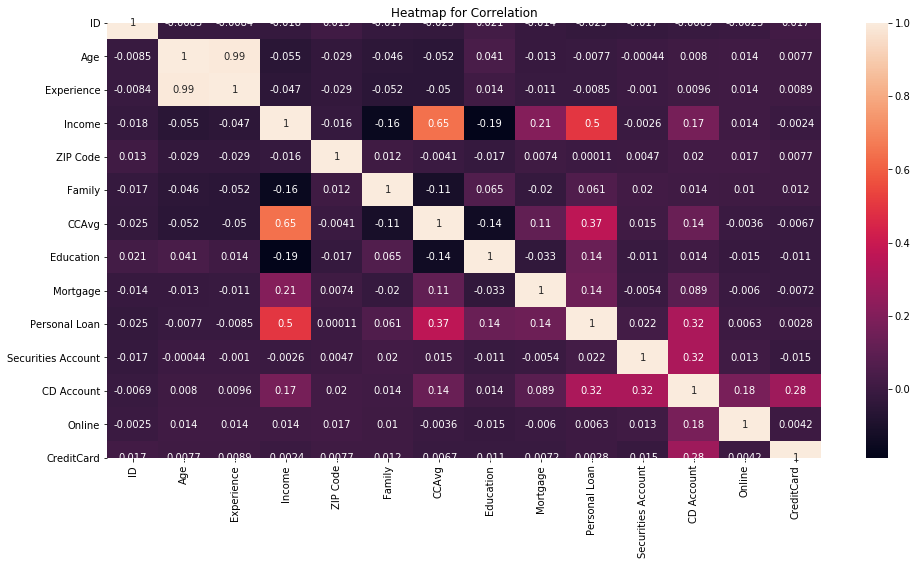

In [139]:
# Plot for Visualising the correlation between variables and Target Column.
fig,ax = plt.subplots( figsize=(16,8) )
sns.heatmap(DF_TheraBank.corr(),annot=True)
plt.title('Heatmap for Correlation')
plt.show()

* Income , CD Account and CCAvg column  are slightly corelated with the Target column
* Others columns such as Income and CCavg are positively corelated.
* Experirnce and Age are highly corelated

### Separating the target column

In [140]:
# Creating seperate DataSets for Target column('Personal Loan') named as 'y' and rest of the features in 'X' 
y = DF_TheraBank["Personal Loan"]
X = DF_TheraBank.drop("Personal Loan",axis=1)

In [141]:
X.drop('ID',axis=1,inplace=True)          # Dropping 'ID' column as it has nothing to do with personal loan column

In [142]:
X.drop('ZIP Code',axis=1,inplace=True)    # Dropping 'Zip code' column aas it has nothing to do with personal loan column

### Splitting the data

In [143]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  # 70:30 ratio

#### Scaling the features

In [144]:
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

### Creating different ML Classification models

#### 1. Logistic Regression

In [145]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accu_test = lr.score(X_test_scaled,y_test)
lr_accu_train = lr.score(X_train_scaled,y_train)
lr_f1 = f1_score(y_test,lr_pred)
print("Training Accuracy :", lr_accu_train)
print("Testing accuracy  :",lr_accu_test)
print("F1 Score :",lr_f1)
print("Logistic Regression Confusion matrix :\n\n", confusion_matrix(y_test,lr_pred))

Training Accuracy : 0.9511428571428572
Testing accuracy  : 0.954
F1 Score : 0.6933333333333334
Logistic Regression Confusion matrix :

 [[1353   19]
 [  50   78]]


#### 2. Naive Bayes

In [146]:
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)
nb_predict = nb.predict(X_test_scaled)
nb_accu_test = nb.score(X_test_scaled,y_test)
nb_accu_train = nb.score(X_train_scaled,y_train)
nb_f1 = f1_score(y_test,nb_predict)
print("Training Accuracy :", nb_accu_train)
print("Testing accuracy  :",nb_accu_test)
print("F1 Score :",nb_f1)
print("Naive Bayes Confusion matrix :\n\n", confusion_matrix(y_test,nb_predict))

Training Accuracy : 0.8825714285714286
Testing accuracy  : 0.886
F1 Score : 0.4672897196261682
Naive Bayes Confusion matrix :

 [[1254  118]
 [  53   75]]


#### 3. KNN

#### Finding the best value for n_neighbors (hyperparameter)

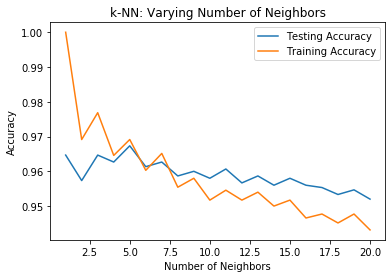

In [147]:
# Plotting a graph between various n_neighbors and accuracy scores.

neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_accuracy[i] = knn.score(X_train_scaled,y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [106]:
#testing accuracy is the highest for 'n_neighbors'=3
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
knn_predict = knn.predict(X_test_scaled)
knn_accu_test = knn.score(X_test_scaled,y_test)
knn_accu_train = knn.score(X_train_scaled,y_train)
knn_f1 = f1_score(y_test,knn_predict)
print("Training Accuracy :", knn_accu_train)
print("Testing accuracy  :",knn_accu_test)
print("F1 Score :",knn_f1)
print("KNN Confusion matrix :\n\n", confusion_matrix(y_test,knn_predict))

Training Accuracy : 0.9768571428571429
Testing accuracy  : 0.9646666666666667
F1 Score : 0.7644444444444445
KNN Confusion matrix :

 [[1361   11]
 [  42   86]]


### Confusion matrix for models

In [107]:
print("Logistic Regression: \n",confusion_matrix(y_test,lr_pred))
print("\n Gaussian Naive Bayes: \n",confusion_matrix(y_test,nb_predict))
print("\n K Nearest Neighbour: \n",confusion_matrix(y_test,knn_predict))

#tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

Logistic Regression: 
 [[1353   19]
 [  50   78]]

 Gaussian Naive Bayes: 
 [[1254  118]
 [  53   75]]

 K Nearest Neighbour: 
 [[1361   11]
 [  42   86]]


### Comparision of the models

In [108]:
df_compare = pd.DataFrame([[lr_accu_train,lr_accu_test,lr_f1],
                           [nb_accu_train,nb_accu_test,nb_f1],
                           [knn_accu_train,knn_accu_test,knn_f1]],
                       columns=['Training Accuracy','Testing Accuracy','F1Score'],
                       index=['Logistic Regression','Gaussian Naive Bayes','KNearest Neighbour',
                              ])
df_compare

,Training Accuracy,Testing Accuracy,F1Score
Logistic Regression,0.951143,0.954000,0.693333
Gaussian Naive Bayes,0.882571,0.886000,0.467290
KNearest Neighbour,0.976857,0.964667,0.764444


In [109]:
# Top models with Highest testing accuracy are - 
df_compare.sort_values(ascending=False,by=['Testing Accuracy'])['Testing Accuracy'].head()

KNearest Neighbour      0.964667
Logistic Regression     0.954000
Gaussian Naive Bayes    0.886000
Name: Testing Accuracy, dtype: float64

In [110]:
# Top models with Highest training accuracy are -
df_compare.sort_values(ascending=False,by=['Training Accuracy'])['Training Accuracy'].head()

KNearest Neighbour      0.976857
Logistic Regression     0.951143
Gaussian Naive Bayes    0.882571
Name: Training Accuracy, dtype: float64

In [111]:
# Top models with highest F1 Score are 
df_compare.sort_values(ascending=False,by=['F1Score'])['F1Score'].head(3)

KNearest Neighbour      0.764444
Logistic Regression     0.693333
Gaussian Naive Bayes    0.467290
Name: F1Score, dtype: float64

## Conclusion

### Testing as well as training accuracy is highest for KNN.

### Reasons why KNN is performing better than other models are 
 * The given dataset has many outlier, and KNN is one of the classification algorithm which can perform better in presence of      outliers.
 * There are many attributes in the dataset which are corelated with each other for example Experience & Age , Income & CCAvg.
   Naive Bayes Algorithm assumes that the features are independent which is not true in this dataset, hence its performance is not 
   good as compared to KNN.


* Objective given as per the document is to predict liability of customers considering minimum possible budget.
* Considering the domain we can say that the model which has less number of False Positive can be considered as a good model.
* KNN is more close in achieving the objective.(Higher accuray + Least False Positive)
* Type 1 and Type 2 errors are less for KNN than the other models, as observed from the confusion matrix. 
* KNN has good values in almost every evaluation tests.
